# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [4]:
DATA_FOLDER = 'Data/' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average* per year of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

Import usefull libraries.

In [2]:
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join
from datetime import datetime

Load the data in one dataframe.

In [5]:
folders = ['guinea', 'liberia', 'sl']
folder_end = '_data/'
folder_begin = 'ebola/'

ebola_data = pd.DataFrame(columns=['country', 'town', 'date', 'description', 'number'])
for folder in folders:
    folder_path = DATA_FOLDER + folder_begin + folder + folder_end
    print("Loading data from %s" % folder)
    for data_file in listdir(folder_path):
        if isfile(join(folder_path, data_file)):
            metas = data_file.replace('.', '-').split('-')
            meta_date = datetime(int(metas[0]), int(metas[1]), int(metas[2]))
            datas = pd.DataFrame.from_csv(folder_path + data_file)
            towns = datas.columns[2:]
            date = datas.index.name
            description = datas.columns[0]
            for town in towns:
                town_data = datas[datas[town] != 0].reset_index().copy()
                town_data['country'] = folder
                town_data['town'] = town
                town_data = town_data[['country', 'town', date, description, town]]
                town_data.columns = ['country', 'town', 'date', 'description', 'number']
                ebola_data = pd.concat([ebola_data, town_data], axis=0)
            
for column in ebola_data.columns:
    print(column)
    print(ebola_data[column].unique())
#print(ebola_data.sample(frac=1).head())

Loading data from guinea
Loading data from liberia
Loading data from sl
country
['guinea' 'liberia' 'sl']
town
['Conakry' 'Gueckedou' 'Macenta' 'Dabola' 'Kissidougou' 'Dinguiraye'
 'Telimele' 'Boffa' 'Kouroussa' 'Dubreka' 'Siguiri' 'Pita' 'Nzerekore'
 'Mzerekore' 'Yomou' 'Forecariah' 'Kerouane' 'Coyah' 'Dalaba' 'Beyla'
 'Kindia' 'Lola' 'Bomi County' 'Bong County' 'Grand Kru' 'Lofa County'
 'Margibi County' 'Maryland County' 'Montserrado County' 'Nimba County'
 'River Gee County' 'RiverCess County' 'Sinoe County' 'Grand Gedeh'
 'Gbarpolu County' 'Grand Bassa' 'Grand Cape Mount' 'Unnamed: 18' 'Kenema'
 'Kono' 'Kambia' 'Koinadugu' 'Bombali' 'Tonkolili' 'Port Loko' 'Pujehun'
 'Bo' 'Moyamba' 'Bonthe' 'Western area urban' 'Western area rural'
 'National' 'Kenema (IFRC)' '34 Military Hospital' 'Police training School'
 'Police traning School' 'Bo EMC' 'Western area' 'Kenema (KGH)'
 'Hastings-F/Town' 'Western area combined']
date
['2014-08-04T00:00:00.000000000' '2014-08-26T00:00:00.000000000'

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [140]:
# Write your answer here
datas = pd.DataFrame()

for i in range(1, 10):
    file_name = '%s/microbiome/MID%d.xls' % (DATA_FOLDER, i)
    data = pd.read_excel(open(file_name,'rb'), header=None)
    data['BARCODE'] = 'MID%d' % i
    datas = pd.concat([datas, data], axis=0)

data = pd.read_excel(open('%s/microbiome/metadata.xls' % (DATA_FOLDER),'rb'))
datas = datas.merge(data, how='left', on='BARCODE')
datas = datas.fillna('unknown')
del datas['BARCODE']
print(datas.sample(frac=1).head())


                                                   0  1 BARCODE
0  Archaea "Crenarchaeota" Thermoprotei Desulfuro...  7    MID1
1  Archaea "Crenarchaeota" Thermoprotei Desulfuro...  2    MID1
2  Archaea "Crenarchaeota" Thermoprotei Sulfoloba...  3    MID1
3  Archaea "Crenarchaeota" Thermoprotei Thermopro...  3    MID1
4  Archaea "Euryarchaeota" "Methanomicrobia" Meth...  7    MID1
3.0916129032258066
                                                      0   1  \
28    Bacteria "Actinobacteria" Actinobacteria Actin...  17   
83    Bacteria "Bacteroidetes" Flavobacteria "Flavob...   7   
457   Bacteria "Fusobacteria" "Fusobacteria" "Fusoba...   2   
687   Bacteria "Bacteroidetes" Flavobacteria "Flavob...   6   
2273  Bacteria "Firmicutes" "Clostridia" Halanaerobi...   1   

                   GROUP   SAMPLE  
28    EXTRACTION CONTROL  unknown  
83    EXTRACTION CONTROL  unknown  
457                NEC 1   tissue  
687            Control 1   tissue  
2273           Control 2    stool  


## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [93]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import HTML

In [94]:
HTML(filename=DATA_FOLDER+'/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

In [138]:
dataf = pd.read_excel('Data/titanic.xls')


## Question 1

The current types of each column can easly be obtained using "mb1.dtypes" as shown in next cell.


In [140]:
dataf_cp = dataf.copy()

print('%-15s %-15s %-35s %-35s' % ('Column Name', 'Column Type', 'Column Min', 'Column Max'))
for col in dataf_cp.columns:
    tmp = dataf_cp[col].dropna()
    if dataf_cp[col].dtypes == 'object':
        tmp = tmp.astype(str)
    print('%-15s %-15s %-35s %-35s' % (col, str(dataf_cp[col].dtypes), str(tmp.min()), str(tmp.max())))


Column Name     Column Type     Column Min                          Column Max                         
pclass          int64           1                                   3                                  
survived        int64           0                                   1                                  
name            object          Abbing, Mr. Anthony                 van Melkebeke, Mr. Philemon        
sex             object          female                              male                               
age             float64         0.1667                              80.0                               
sibsp           int64           0                                   8                                  
parch           int64           0                                   9                                  
ticket          object          110152                              WE/P 5735                          
fare            float64         0.0                             

We can change in categorical every columns that has a limited number of distinct value, like: pclass, survived, sex, sibsp, parch, embarked, boat and home.dest.

In [143]:
to_categorical = ['pclass','survived', 'sex', 'sibsp', 'parch', 'embarked', 'boat', 'home.dest']
for c in to_categorical:
    dataf[c] = dataf[c].astype('category')

## Question 2

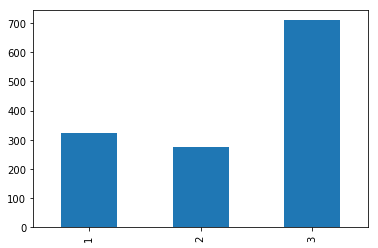

In [142]:
dataf.pclass.value_counts().sort_index().plot(kind='bar')

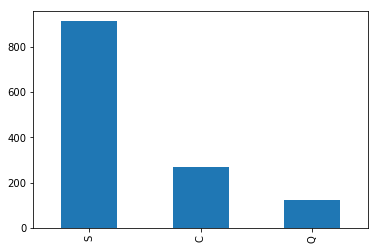

In [112]:
dataf.embarked.value_counts().plot(kind='bar')

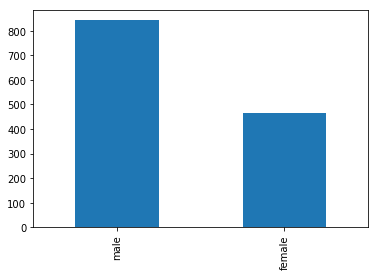

In [115]:
dataf.sex.value_counts().plot(kind='bar')

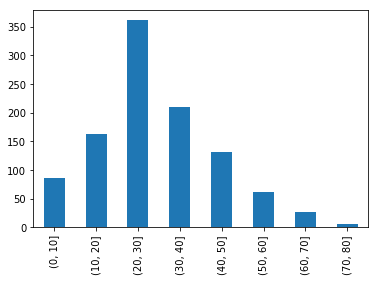

In [357]:
pd.cut(dataf.age, [x for x in range(0, int(dataf.age.max()) + 1, 10)]).value_counts().sort_index().plot(kind='bar')

## Question 3

As the datas are note clear for the cabin column, we arbitrarily picked the first letter of the first cabin that appears in the cell for the floor. For cabin with cell "C22 D26", we assign the cabin at floor C.

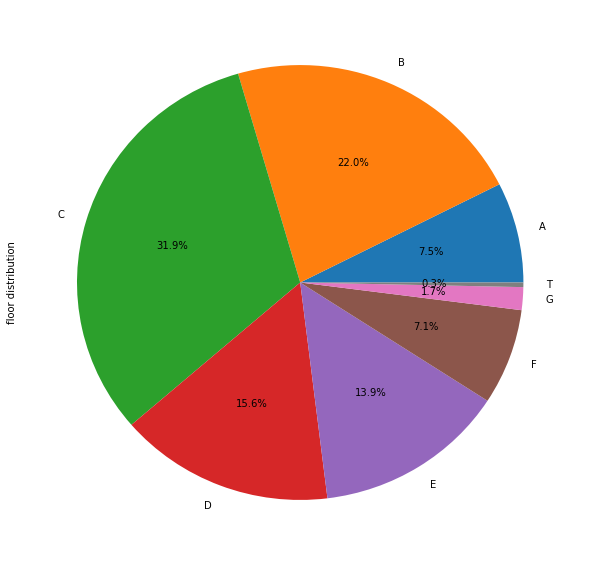

In [169]:
floor = dataf.cabin.copy().dropna().apply(lambda x : x[0]).astype('category').rename('floor distribution')
data_cabin.value_counts().sort_index().plot(kind='pie', autopct='%1.1f%%', figsize=(10,10))

## Question 4

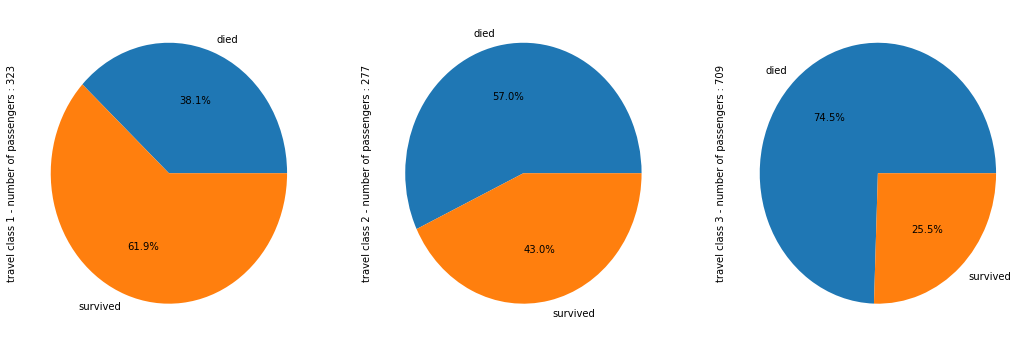

In [354]:

fig, axes = plt.subplots(nrows=1, ncols=len(dataf.pclass.unique()))

for cl in dataf.pclass.unique():
    tmp = dataf[dataf.pclass == cl]
    tmp.survived.rename('travel class ' + str(cl) + " - number of passengers : " + str(tmp.shape[0])).value_counts().sort_index().plot(kind='pie', 
                        ax=axes[cl-1], figsize=(18,6), autopct='%1.1f%%', labels=['died', 'survived'])
    

## Question 5

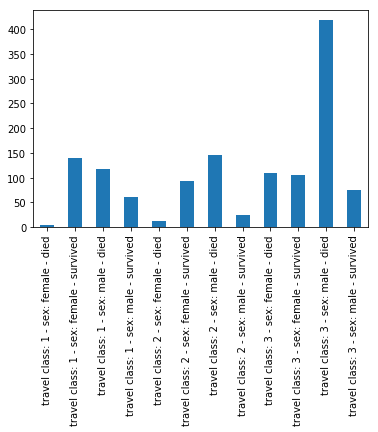

In [222]:
dataf_res = pd.Series()

tab_survived = ['died', 'survived']

for cl in dataf.pclass.unique():
    for s in dataf.sex.unique():
        tmp = dataf[(dataf.pclass == cl) & (dataf.sex == s)].survived.value_counts().sort_index()
        dataf_res.set_value('travel class: ' + str(cl) + ' - sex: ' + str(s) + ' - ' + tab_survived[tmp.index[0]], tmp.values[0])
        dataf_res.set_value('travel class: ' + str(cl) + ' - sex: ' + str(s) + ' - ' + tab_survived[tmp.index[1]], tmp.values[1])

dataf_res.plot(kind='bar')

## Question 6

In [325]:
dataf6 = dataf.copy()
dataf6.age=pd.qcut(dataf6.age, 2).dropna()

dataf6.rename(columns={'age':'grouped_age'}, inplace=True)

grouped_index = dataf6.groupby([dataf6.grouped_age, dataf6.pclass, dataf6.sex])
final_data_frame = grouped_index.survived.value_counts().unstack('survived')

final_data_frame.columns = ['dead','survived']
final_data_frame


dead  survived
grouped_age   pclass sex                   
(0.166, 28.0] 1      female     2        39
                     male      15        17
              2      female     5        51
                     male      58        16
              3      female    53        56
                     male     183        41
(28.0, 80.0]  1      female     3        89
                     male      83        36
              2      female     6        41
                     male      77         7
              3      female    27        16
                     male     107        18